In [1]:
from concurrent.futures import ThreadPoolExecutor
import os
import cv2
from matplotlib import pyplot as plt

The data will be formatted to the size of 512x512 and we will increase the contrast

In [2]:
TARGET_SIZE = (512, 512)
ALPHA = 1.5
BETA = 0

The dataset was downloaded from the resource [Kaggle](https://www.kaggle.com/datasets/isaienkov/deforestation-in-ukraine) and from it we get photos of the format '.jp2', which contain in the name 'TCI'

In [3]:
def copy_and_resize_image(file_path, destination_path):
    img = cv2.imread(file_path, cv2.IMREAD_UNCHANGED)
    if img is not None:
        resized_img = cv2.resize(img, TARGET_SIZE)
        enhanced_img = cv2.convertScaleAbs(resized_img, alpha=ALPHA, beta=BETA)
        cv2.imwrite(destination_path, enhanced_img)
        print(f"Copied and resized: {file_path}")
    else:
        print(f"Failed to load image: {file_path}")
                    

We will use a multi-threaded approach to speed up work

In [4]:
def process_images(source_directory, destination_directory, image_format='.jp2', max_workers=6):
    if not os.path.exists(destination_directory):
        os.makedirs(destination_directory)

    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        futures = []
        for root, dirs, files in os.walk(source_directory):
            for file in files:
                if file.endswith(image_format) and 'TCI' in file:
                    file_path = os.path.join(root, file)
                    destination_path = os.path.join(destination_directory, file.replace(image_format, '.jpg'))
                    futures.append(executor.submit(copy_and_resize_image, file_path, destination_path))
        
        for future in futures:
            future.result() 

In [5]:
source_directory = 'archive'
destination_directory = 'data'

process_images(source_directory, destination_directory)

Copied and resized: archive\S2A_MSIL1C_20160405T085012_N0201_R107_T36UYA_20160405T085012\S2A_MSIL1C_20160405T085012_N0201_R107_T36UYA_20160405T085012.SAFE\GRANULE\L1C_T36UYA_A004108_20160405T085012\IMG_DATA\T36UYA_20160405T085012_TCI.jp2
Copied and resized: archive\S2A_MSIL1C_20160618T082602_N0204_R021_T36UYA_20160618T083357\S2A_MSIL1C_20160618T082602_N0204_R021_T36UYA_20160618T083357.SAFE\GRANULE\L1C_T36UYA_A005166_20160618T083357\IMG_DATA\T36UYA_20160618T082602_TCI.jp2
Copied and resized: archive\S2A_MSIL1C_20160330T082542_N0201_R021_T36UYA_20160330T082810\S2A_MSIL1C_20160330T082542_N0201_R021_T36UYA_20160330T082810.SAFE\GRANULE\L1C_T36UYA_A004022_20160330T082810\IMG_DATA\T36UYA_20160330T082542_TCI.jp2
Copied and resized: archive\S2A_MSIL1C_20160509T082612_N0202_R021_T36UYA_20160509T083548\S2A_MSIL1C_20160509T082612_N0202_R021_T36UYA_20160509T083548.SAFE\GRANULE\L1C_T36UYA_A004594_20160509T083548\IMG_DATA\T36UYA_20160509T082612_TCI.jp2
Copied and resized: archive\S2A_MSIL1C_20160212T

Let's display the first ten images of the dataset

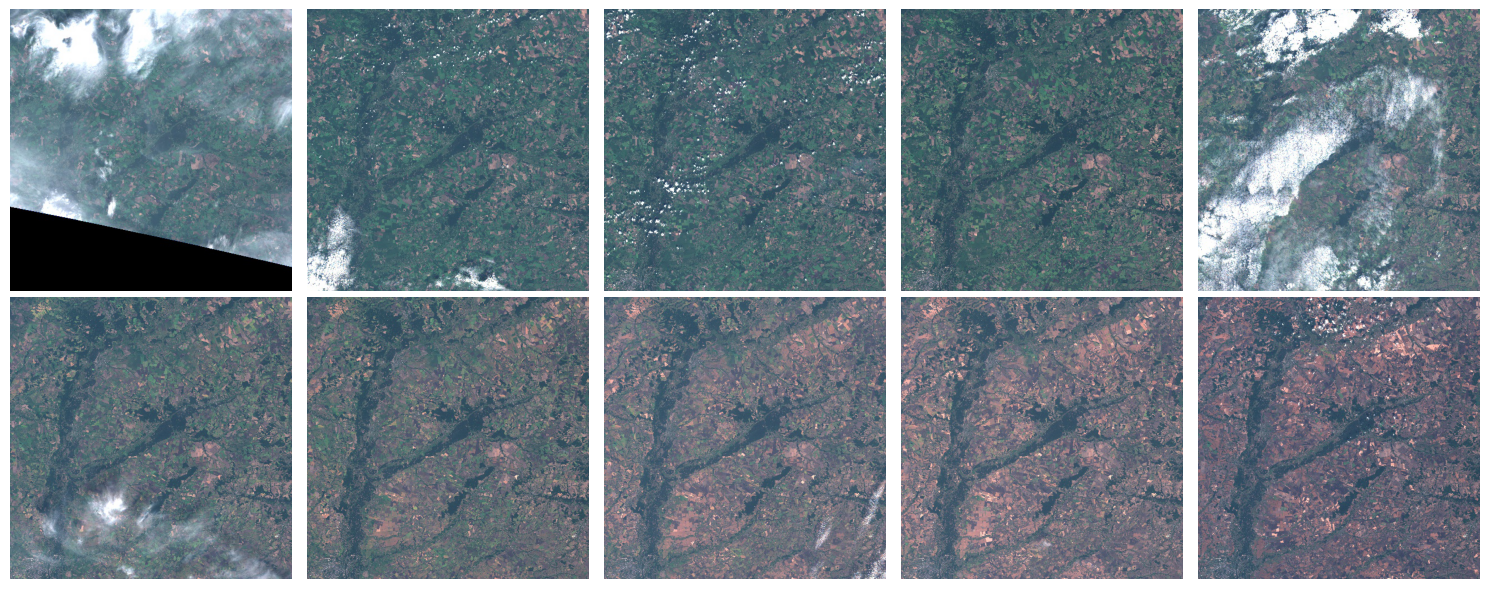

In [6]:
images = [cv2.cvtColor(cv2.imread(os.path.join(destination_directory, f)), cv2.COLOR_BGR2RGB)
          for f in os.listdir(destination_directory) if f.endswith('.jpg')][:10]

plt.figure(figsize=(15, 6))
for i, img in enumerate(images):
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.tight_layout()
plt.show()